# Lecture 7: Unsupervised Learning - Clustering

1. Partition-based: K-means
2. Density-based: DBSCAN
3. Hierarchical-based: AgglomerativeHierarchicalClustering
3. Visualization using PCA

## Clustering
**Grouping a collection of objects into groups or clusters, such that objects within each cluster are more similar than objects assigned to different clusters**

## Clustering - an ill defined problem
We choose the means by which we evaluate whether one clustering method is better than others.

Many ways to measure similarity --> clustering is ill defined

Usually some notion of distance as a measure of dissimilarity.

## 1. K-means clustering
> **Goal**:
Given datapoints $D = \{x_1,...,x_n\}$, and parameter $K$ the number of clusters, find a grouping of datapoints, such that the distance of points inside one class are small and distance of points between distinct classes are large.

<img src="img\kmeans.jpeg" alt="Drawing" style="width: 600px;"/>

**Solution:** Minimize within-cluster sum of squares 

$\underset{S}{argmin}\sum_{i=1}^{k}\sum_{x\in S_i}\lVert x -\mu_i\rVert^2$
 
Sum of all pairwise distances in the dataset is given by

$T :=\sum_{i=1}^{k}\sum_{x\in S_i}\big( \sum_{x'\in S_i}d(x,x') + \sum_{x''\not\in S_i}d(x,x') \big) = w(C) + b(C)$,

where $w(C)$ is the sum of pairwise distances of points in the same cluster and similarly, $b(C)$ is the sum of pairwise distances of points in the different clusters.


Implies maximizing between class distances

**Algorithm:**

Initialize $k$ cluster centers $\mu_1,...,\mu_k$ randomly.
- **Assignment step:**
Assign each observation to the cluster with the nearest mean, i.e. with the least distance: 
    - $S_i^{(t)} = \{ \lVert x_p - \mu_i^{(t)} \rVert^2 \leq \lVert x_p - \mu_j^{(t)} \rVert^2  \forall j 1\leq j\leq k\}$
- **Update step:** Recalculate means for each cluster: 
    - $\mu_i^{(t+1} = \frac{1}{|S_i^{(t)}|} \sum_{x_j\in S_i^{(t)}}x_j$

In [1]:
# k means code example using sklearn
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2).fit(X)
print(kmeans.labels_)
kmeans.predict([[0,0], [12,3]])

[0 0 0 1 1 1]


array([0, 1])

>Note: The algorithm does not guarantee convergence to the global optimum. The result may depend on the initial clusters. As the algorithm is usually fast, it is common to run it multiple times with different starting conditions.

Usually fast: $O(n * K * I * d)$ runtime complexity

- n : number of points
- K : number of clusters
- I : number of iterations
- d : number of attributes

### Mini-batch K-means

Standard K-means: worst case [runtime](http://cseweb.ucsd.edu/~avattani/papers/kmeans-journal.pdf) is exponential

Iterate two steps:
1. Randomly sample $b$ samples from the dataset, to form a mini-batch and assign them to their nearest centroid. 
2. For each sample in the mini-batch,update the assigned centroid by taking the streaming average of the sample and all previous samples assigned to that centroid. 
 
This has the effect of decreasing the rate of change for a centroid over time. 

These steps are performed until convergence or a predetermined number of iterations is reached.

In [2]:
# mini-batch k means code example using sklearn
from sklearn.cluster import MiniBatchKMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])
kmeans = MiniBatchKMeans(n_clusters=2).fit(X)
print(kmeans.labels_)

kmeans.predict([[0,0], [12,3]])
print(kmeans.cluster_centers_)

[0 0 0 1 1 1]
[[ 1.          2.12903226]
 [10.          1.90150479]]


Pros:
 - simple and effective
 - scales comparably well with larger datasets
 - guarantees convergence (local optima)
 - easily adapts to new datapoints

Cons:
 - sensitive to initialization
 - sensitive to outliers
 - optimal number of clusters unknown
 - primarily for spherical clusters

## 1. K-means++
K-means++: initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in [“k-means++: The advantages of careful seeding”(Arthur, David, Vassilvitskii, 2007)](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf) 

> **Idea:** Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid.

In [3]:
# k means++ code example using sklearn
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=2, init='k-means++').fit(X)
print(kmeans.labels_)
kmeans.predict([[0,0], [12,3]])

[1 1 1 0 0 0]


array([1, 0])

## What can go wrong?
Consider the update step of the K-means algorithm:
- **Update step:** Recalculate means for each cluster: 
    - $\mu_i^{(t+1} = \frac{1}{|S_i^{(t)}|} \sum_{x_j\in S_i^{(t)}}x_j$

Let 62, 64, 65, 62, 120, be the weight measurements of 5 students. 

The mean is 74.6, which is greater than 80% of the individual weights. 

Computing the median instead, which is 64 the data is almost accurately described.

## 1. K-medoids
Initialize $k$ cluster centers $\mu_1,...,\mu_k$ randomly.
- **Assignment step:**
Assign each observation to the cluster with the **closest** mean, according to some distance $d$
    - $S_i^{(t)} = \{ d(x_p, \mu_i) \leq  d(x_p, \mu_j)  \forall j 1\leq j\leq k\}$
- **Update step:** Recalculate medians for each cluster: 
    - $\mu_i^{(t+1} = median(S_i)$

## Distance/Metric
A metric or distance function is a function that defines a distance between elements of a set.

A metric on a set X is a function $d: X\times X \rightarrow \mathbb{R}$

A distance is required to satisfy
 - $d_{ij} \geq 0$
 - $d_{ij} = d{ji}$
 - $d_{ij} = 0,$ if $(x_i = x_j)$
 - $d_{ij} \leq d_{ik} + d_{kj}$

for all $x_i,x_j,x_k\in X$.

## Kernel
Another view on kernels: 

A kernel is a measure of similarity of two points, that is positive semi definite: 

- $s(a, b) > s(a, c)$ if objects $a$ and $b$ are considered “more similar” than objects $a$ and $c$

## _sklearn.metrics.pairwise_distances_

```python
>>> import numpy as np
>>> from sklearn.metrics import pairwise_distances
>>> from sklearn.metrics.pairwise import pairwise_kernels
>>> X = np.array([[2, 3], [3, 5], [5, 8]])

>>> pairwise_distances(X, metric='manhattan')
array([[0., 3., 8.],
       [3., 0., 5.],
       [8., 5., 0.]])
>>> pairwise_kernels(X, metric='linear')
array([[13. 21. 34.]
       [21. 34. 55.]
       [34. 55. 89.]])
```

Can be used with a kernel matrix ,e.g. using as a similarity measure one of 
 - [cosine similarity](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) (popular for similarity of text, i.e. tf-idf vectors)
 - [rbf kernel](https://scikit-learn.org/stable/modules/metrics.html#rbf-kernel)
 - [laplacian kernel](https://scikit-learn.org/stable/modules/metrics.html#laplacian-kernel)

https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html

## 2. DBSCAN  - Density-Based Spatial Clustering of Applications with Noise
>**Main idea:** A point belongs to a cluster if it is close to many points from that cluster.

**Two parameters:**
- $eps$: The distance that specifies the neighborhoods. Two points $x$ and $x'$ are considered to be neighbors if $d(x, x') \leq eps$
where $d$ is a distance function
- MinPts: Minimum number of points to define a cluster

Given a dataset $D$, define the neighborhood of a point $p$ by
- $N(p) := \{q\in D: d(p,q) \leq \epsilon \}$

<img src="img\dbscan2.png" alt="Drawing" style="width: 300px;"/>
Define a point $p$ as

- **Core point**, if $|N(p)| \geq MinPts$,
- **Border point**, if  $|N(p)| < MinPts$ but there exists a Core point $\in N(p)$.
- **Noise** otherwise.

### Algorithm steps
Start with random point $p\in D$ and set current cluster index C=0

### Loop points $p\in D$:
1.  determine the $\epsilon$-neighborhood $N(p)$, e.g. using [sklearn.neighbors.KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn-neighbors-kdtree)

2. **If** $N(p) \geq MinPts$: do_cluster_formation **else**: $p = Noise$

### do_cluster_formation(p):
- assign all points $p' \in N(p)$ to current_cluster C and if $p'$ is corepoint also add their neighborhood. Repeat until no more points can be assigned. Then increase cluster index C by one.

Runtime is $O(n log n)$, i.e. KDtree query for each datapoint!

However, finding $\epsilon$ and $MinPts$ can be tricky.


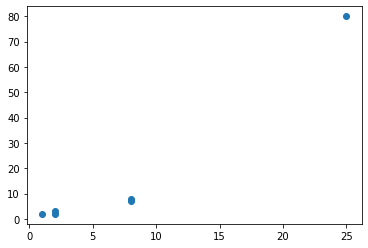

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [4]:
# code example using DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
plt.scatter(X[:,0], X[:,1])
plt.show()
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

## 3. Hierarchical Clustering - Fundamentally different from the other clustering paradigms
<img src="img\comp.jpeg" alt="Drawing" style="width: 300px;"/>

## 3. Agglomerative: Bottom up approach of hierarchical clustering

### **Divisive**: Top-down approach

### **General procedure Agglomerative Clustering**:
- Start with the points as individual clusters
- At each clustering step, merge the closest pair of clusters until only one cluster (or k clusters) left

### **Closeness** determined by distance Matrix, e.g ```pairwise_distances``` 

## 3. Agglomerative Hierarchical Clustering

<img src="img\1.png" alt="Drawing" style="width: 300px;"/>

This and the following 4 slides have been taken from 

https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis.pdf

<img src="img\2.png" alt="Drawing" style="width: 300px;"/>

<img src="img\3.png" alt="Drawing" style="width: 300px;"/>

<img src="img\4.png" alt="Drawing" style="width: 300px;"/>

<img src="img\5.png" alt="Drawing" style="width: 300px;"/>

- Produces a set of nested clusters organized as a hierarchical tree (the order of joining the sets is tracked)

- Can be visualized using a Dendrogram. https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

**But how to read it?**

[Dendrogram exaple](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

<img src="img\dendrogram.png" alt="Drawing" style="width: 600px;"/>

## Summary - Clustering paradigms

- **Partition-based Clustering:** A division data objets into subsets (clusters) such that each data object is in exactly one subset
- K-Means: use when assumption of convex and isotropic clusters is not too strongly violated, do not use when clusters have different sizes

- **Density-based Clustering:** Cluster is dense region of points, separated by low-density regions
- DBSCAN: use when clusters are irregular, intertwined, and contain noise/outliers

- **Hierarchical-based Clustering:** set of nested clusters organized as a hierarchical tree (Dendogram)

- Agglomerative-HC: use with categorical data and to get a visual summary of the distance matrix (Dendrogram), FeatureAgglomeration as dimensionality reduction technique

## Clustering evaluation

**If** you have labels:
 - ```sklearn.metrics.rand_score(labels_true, labels_pred)``` will give you (number of agreeing pairs) / (number of pairs)

If you **don't** have labels:
- ```sklearn.metrics.silhouette_score(X, labels_pred)``` will give you $\frac{b-a}{max(a,b)}$, where 

- **a**: The mean distance between a sample and all other points in the **same** cluster,
- **b**: The mean distance between a sample and all other points in the **next nearest** cluster,

## 4. Visualization using PCA
Preview for the next lecture

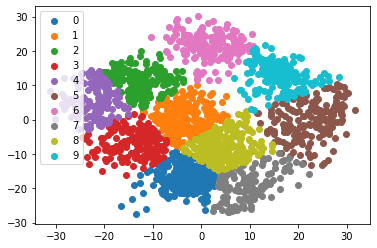

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# load data
data = load_digits().data
# reduce data to 2D
pca = PCA(2)
data = pca.fit_transform(data)
# do kmeans clustering
kmeans = KMeans(n_clusters=10)
label = kmeans.fit_predict(data)
# plot each label
for l in [0,1,2,3,4,5,6,7,8,9]:
    plt.scatter(data[label==l, 0], data[label==l, 1], label=l)
    
plt.legend()
plt.show()

# The End - happy to see you in the exercise session!